# Exam Scores


## Author: Buhle Maphela

### Student No: 217076335

### Due Date: 14 April 2023

### Sourse: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

### Github url: https://github.com/Buhle107/217076335_Assignment-3/blob/main/workingProgress.ipynb


# About Dataset

This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.
"This dataset was created for educational purposes and was generated, not collected from actual data sources."

###### Columns:
• Gender: The gender of the student (male/female)

• Race/ethnicity: The student's racial or ethnic background (White, African, Indian, and Coloured.)

• Parental level of education: The highest level of education attained by the student's parent(s) or guardian(s)

• Math score: The student's score on a standardized mathematics test

• Reading score: The student's score on a standardized reading test

• Writing score: The student's score on a standardized writing test

This dataset could be used for various research questions related to education, such as examining the impact of parental education or test preparation courses on student performance. It could also be used to develop machine learning models to predict student performance based on demographic and other factors.

# My Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gmean
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Reading my data 

In [2]:

exams_df = pd.read_excel('C:\\Users\\buhle\\Downloads\\Data set\\exam scores.xlsx')
exams_df

,Gender,Race/Ethnicity,Parental level of education,Math score,Reading score,Writing score
0,female,Indian,College,59,70,78
1,male,Indian,Diploma,96,93,87
2,female,Indian,College,57,76,77
3,male,White,College,70,70,63
4,female,Indian,Diploma,83,85,86
...,...,...,...,...,...,...
115,female,Indian,Degree,98,95,100
116,female,Indian,High school,90,96,88
117,male,Coloured,High school,64,71,68
118,female,White,High school,38,55,52


In [3]:
exams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       120 non-null    object
 1   Race/Ethnicity               120 non-null    object
 2   Parental level of education  120 non-null    object
 3   Math score                   120 non-null    int64 
 4   Reading score                120 non-null    int64 
 5   Writing score                120 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 5.8+ KB


In [4]:
exams_df.nunique()

Gender                          2
Race/Ethnicity                  4
Parental level of education     5
Math score                     49
Reading score                  50
Writing score                  55
dtype: int64

## 1.1 Five number summary

In [5]:
exams_df.describe().round(2)

,Math score,Reading score,Writing score
count,120.00,120.00,120.00
mean,69.65,72.33,70.85
std,15.20,14.12,14.49
min,23.00,33.00,33.00
25%,61.75,64.75,60.75
50%,69.00,74.00,73.50
75%,80.00,82.00,80.25
max,100.00,97.00,100.00


## 1.2 Check for null values

In [6]:
exams_df.isnull().sum()

Gender                         0
Race/Ethnicity                 0
Parental level of education    0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64

## 2. Cleaning my dataset

### Note:

#### Gender:
    Female:  1                                                  
    Male:    0 
#### Race/Ethnicity:
    African:  1
    White:	  2
    Coloured: 3
    Indian:	  4
#### Parental level of education
    High school:	    1
    College:    	    2
    Diploma:    	    3
    Degree:     	    4
    Master's Degree:    5

In [7]:
exams_dfClean = exams_df

exams_dfClean['Gender'] = exams_dfClean['Gender'].replace({'female' : 1, 'male':0})

exams_dfClean['Race/Ethnicity'] = exams_dfClean['Race/Ethnicity'].replace({'African' : 1, 'White' :2, 'Coloured' :3, 'Indian' :4})
exams_dfClean['Parental level of education'] = exams_dfClean['Parental level of education'].replace({'High school' :1, 'College' :2, 'Diploma' :3, 'Degree' : 4,"Master's degree" :5})

exams_dfClean

,Gender,Race/Ethnicity,Parental level of education,Math score,Reading score,Writing score
0,1,4,2,59,70,78
1,0,4,3,96,93,87
2,1,4,2,57,76,77
3,0,2,2,70,70,63
4,1,4,3,83,85,86
...,...,...,...,...,...,...
115,1,4,4,98,95,100
116,1,4,1,90,96,88
117,0,3,1,64,71,68
118,1,2,1,38,55,52


## 3. Descriptive Statistics

### 3.1 Mean

In [8]:
average = exams_dfClean.mean()
dataframe = pd.DataFrame({'Mean':average})
dataframe



,Mean
Gender,0.491667
Race/Ethnicity,2.900000
Parental level of education,2.391667
Math score,69.650000
Reading score,72.333333
Writing score,70.850000


### 3.2 Median

In [9]:
middle = exams_dfClean.median()
dataframe = pd.DataFrame({'Median':middle})
dataframe

,Median
Gender,0.0
Race/Ethnicity,3.0
Parental level of education,2.0
Math score,69.0
Reading score,74.0
Writing score,73.5


### 3.3 Minimum

In [10]:
min = exams_dfClean.min()
dataframe = pd.DataFrame({'Mimimum':min})
dataframe

,Mimimum
Gender,0
Race/Ethnicity,1
Parental level of education,1
Math score,23
Reading score,33
Writing score,33


### 3.4 Maximum

In [11]:
max = exams_dfClean.max()
dataframe = pd.DataFrame({'Maximum':max})
dataframe

,Maximum
Gender,1
Race/Ethnicity,4
Parental level of education,5
Math score,100
Reading score,97
Writing score,100


### 3.5 Range

In [12]:
for col in exams_dfClean.columns:
    col_range = exams_dfClean[col].max() - exams_dfClean[col].min()
    print(f"Range for column {col}: {col_range}")



Range for column Gender: 1
Range for column Race/Ethnicity: 3
Range for column Parental level of education: 4
Range for column Math score: 77
Range for column Reading score: 64
Range for column Writing score: 67


### 3.6 Mode

In [13]:
mode = exams_dfClean.apply(lambda x: x.value_counts().idxmax())
dataframe = pd.DataFrame({'Mode':mode})
print(dataframe)

                             Mode
Gender                          0
Race/Ethnicity                  3
Parental level of education     1
Math score                     80
Reading score                  82
Writing score                  74


### 3.7 Quartiles (1st, 2nd & 3rd)

In [14]:
exams_dfClean.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

,Gender,Race/Ethnicity,Parental level of education,Math score,Reading score,Writing score
0.25,0.0,2.0,1.0,61.75,64.75,60.75
0.50,0.0,3.0,2.0,69.00,74.00,73.50
0.75,1.0,4.0,3.0,80.00,82.00,80.25


### 3.8 Skewness

In [15]:
skew = stats.skew(exams_dfClean)
dataframe = pd.DataFrame({'Skewness':skew})
print(dataframe)

   Skewness
0  0.033338
1 -0.351651
2  0.591660
3 -0.383952
4 -0.594250
5 -0.470737


### 3.9 Variance

In [16]:
variance = exams_dfClean.var()
dataframe = pd.DataFrame({'Variance':variance})
print(dataframe)

                               Variance
Gender                         0.252031
Race/Ethnicity                 0.880672
Parental level of education    1.702451
Math score                   231.136975
Reading score                199.350140
Writing score                209.977311


### 3.10 Standard Deviation

In [17]:
std = exams_dfClean.std()
dataframe = pd.DataFrame({'Standard deviation':std})
print(dataframe)

                             Standard deviation
Gender                                 0.502027
Race/Ethnicity                         0.938441
Parental level of education            1.304780
Math score                            15.203190
Reading score                         14.119141
Writing score                         14.490594


### 3.11 Coefficient of variance

In [18]:
cv = exams_dfClean.std() / exams_dfClean.mean()
dataframe = pd.DataFrame({'Coefficient of variance':cv})
print(dataframe)

                             Coefficient of variance
Gender                                      1.021071
Race/Ethnicity                              0.323600
Parental level of education                 0.545553
Math score                                  0.218280
Reading score                               0.195195
Writing score                               0.204525


### 3.12 Interquatile Range

In [19]:
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

IQR = exams_dfClean.apply(find_iqr)
dataframe = pd.DataFrame({'Interquatile Range':IQR})
print(dataframe)

                             Interquatile Range
Gender                                     1.00
Race/Ethnicity                             2.00
Parental level of education                2.00
Math score                                18.25
Reading score                             17.25
Writing score                             19.50


### 3.13 Geometric mean

In [20]:
geoMean = gmean(exams_dfClean)
dataframe = pd.DataFrame({'Geometric mean':geoMean})
print(dataframe)

   Geometric mean
0        0.000000
1        2.716085
2        2.044704
3       67.752981
4       70.768180
5       69.193403


### 3.14 Standard Error

In [21]:
SE = exams_dfClean.sem(axis = 0)
dataframe = pd.DataFrame({'Starndard error':SE})
print(dataframe)

                             Starndard error
Gender                              0.045829
Race/Ethnicity                      0.085668
Parental level of education         0.119110
Math score                          1.387855
Reading score                       1.288895
Writing score                       1.322804


### 3.15 Kurtosis

In [22]:
kurt = stats.kurtosis(exams_dfClean)
dataframe = pd.DataFrame({'Kurtosis':kurt})
print(dataframe)

   Kurtosis
0 -1.998889
1 -0.881199
2 -0.708648
3  0.187774
4  0.000315
5 -0.270862


### 3.16 Z-Scores for the smallest value

In [23]:
min_vals = exams_dfClean.min()
min_zscores = zscore(min_vals)
dataframe = pd.DataFrame({'Z-Scores':min_zscores})
print(dataframe)

                             Z-Scores
Gender                      -1.019132
Race/Ethnicity              -0.951937
Parental level of education -0.951937
Math score                   0.526365
Reading score                1.198320
Writing score                1.198320


### 3.17 Z-Scores for the largest value

In [24]:
max_vals = exams_dfClean.max()
max_zscores = zscore(max_vals)
dataframe = pd.DataFrame({'Z-Scores':max_zscores})
print(dataframe)

                             Z-Scores
Gender                      -1.048221
Race/Ethnicity              -0.985536
Parental level of education -0.964642
Math score                   1.020361
Reading score                0.957677
Writing score                1.020361


### 3.18 Sum

In [25]:
sum = exams_dfClean.sum(axis=1)
dataframe = pd.DataFrame({'Sum':sum})
print(dataframe)

     Sum
0    214
1    283
2    217
3    207
4    262
..   ...
115  302
116  280
117  207
118  149
119  275

[120 rows x 1 columns]


### 3.19 Correlation

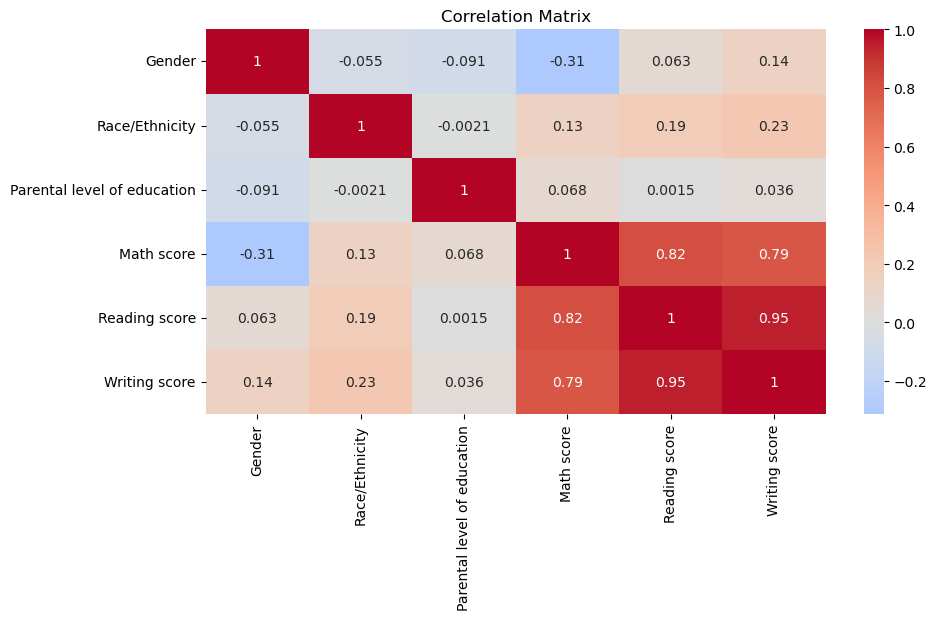

In [26]:
corr_matrix = exams_dfClean.corr()
# print(corr_matrix)

plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 4. GRAPHS

## 4.1 Bar Plot
#### A bar plot can be used to visualize the mean score for each subject, grouped by gender:

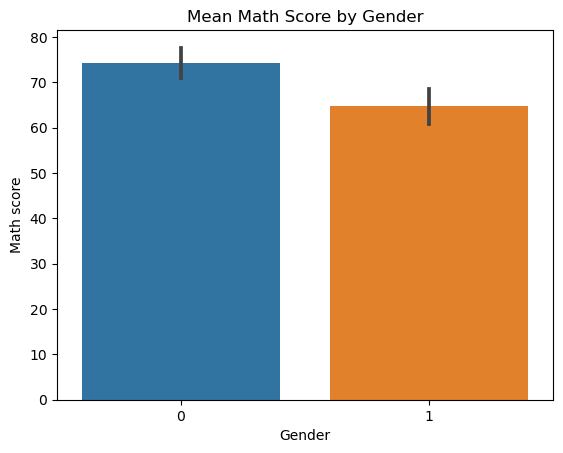

In [27]:
sns.barplot(x="Gender", y="Math score", data=exams_dfClean)
plt.title("Mean Math Score by Gender")
plt.show()

## 4.2 Box Plot
#### A box plot can be used to visualize the distribution of each subject, grouped by race/ethnicity:

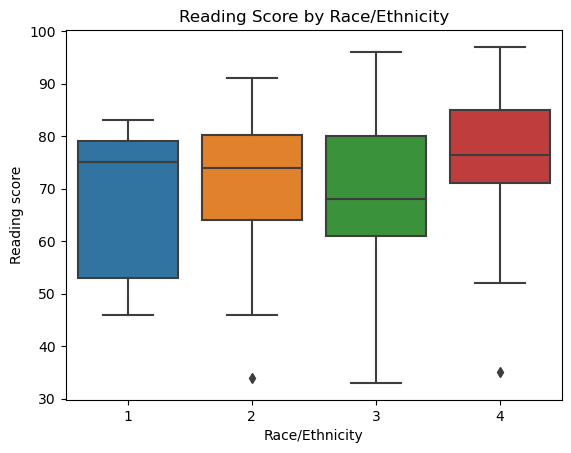

In [28]:
sns.boxplot(x="Race/Ethnicity", y="Reading score", data=exams_dfClean)
plt.title("Reading Score by Race/Ethnicity")
plt.show()

## 4.3 Scatter Plot
#### A scatter plot can be used to visualize the relationship between two variables.

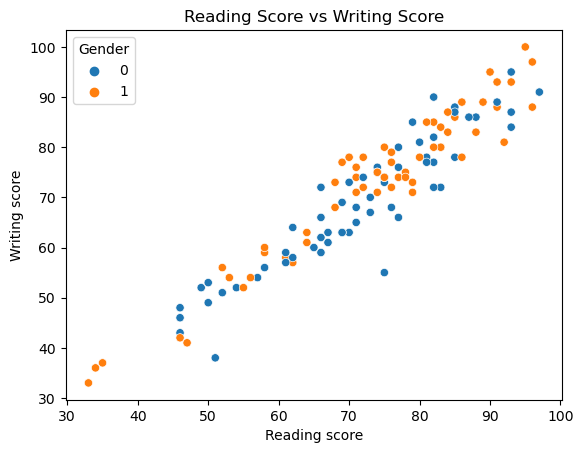

In [29]:
sns.scatterplot(x="Reading score", y="Writing score", hue="Gender", data=exams_dfClean)
plt.title("Reading Score vs Writing Score")
plt.show()

## 4.4 Histogram
#### A histogram with 10 bins, showing the distribution of writing scores in the dataset.

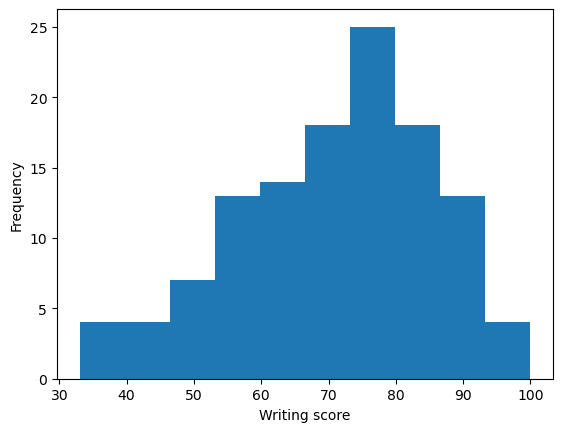

In [30]:
plt.hist(exams_dfClean["Writing score"], bins=10)
plt.xlabel("Writing score")
plt.ylabel("Frequency")
plt.show()

## 4.5 Line Graph
#### A line graph showing how the writing scores change over time

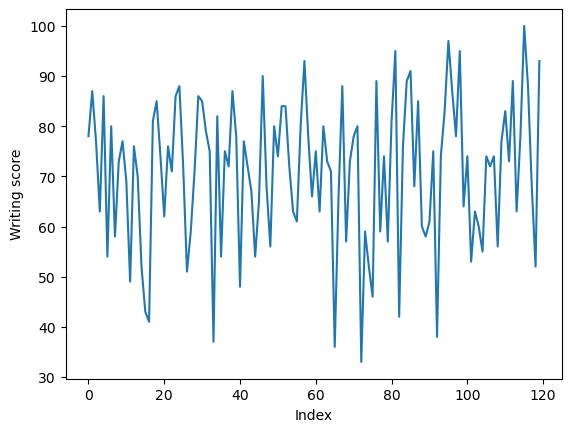

In [31]:
plt.plot(exams_dfClean["Writing score"])
plt.xlabel("Index")
plt.ylabel("Writing score")
plt.show()

## 4.6 Pie Chart
#### A pie chart showing the proportion of each race/ethnicity in the dataset

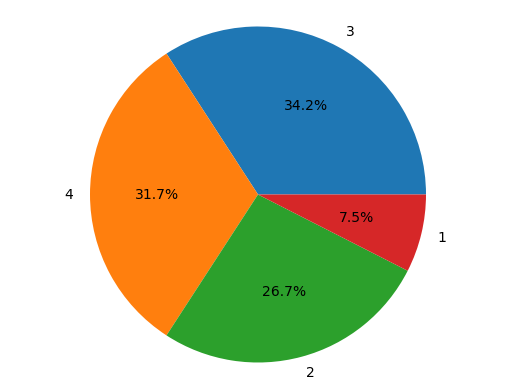

In [32]:
race_counts = exams_dfClean["Race/Ethnicity"].value_counts()
labels = race_counts.index
sizes = race_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## 4.7 Violin Plot
#### A violin plot shows the distribution of math reading for each race/ethnicity in the dataset

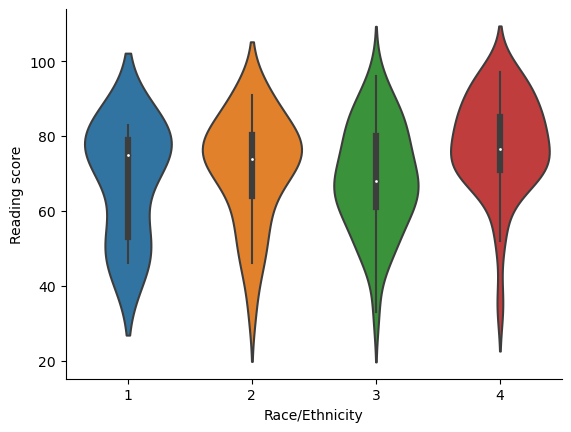

In [33]:
sns.violinplot(x="Race/Ethnicity", y="Reading score", data=exams_dfClean)
sns.despine()

## 4.8 Scatter plot matrix
####  A scatter plot matrix showing the pairwise relationships between the math score, reading score, and writing score variables in the dataset

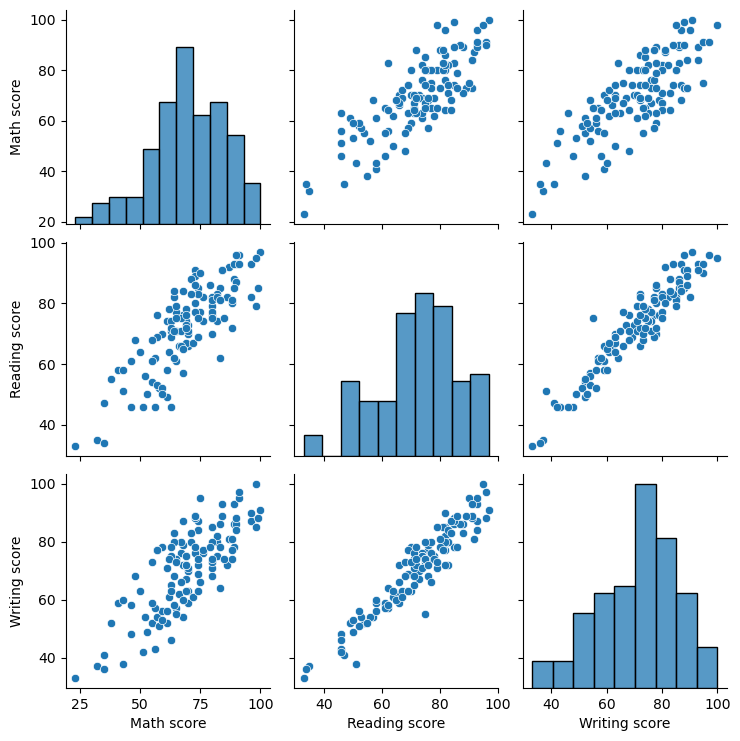

In [34]:
sns.pairplot(exams_dfClean, vars=["Math score", "Reading score", "Writing score"])

## 4.9 Regression
#### A regression line that shows the relationship between Reading and Math score. 

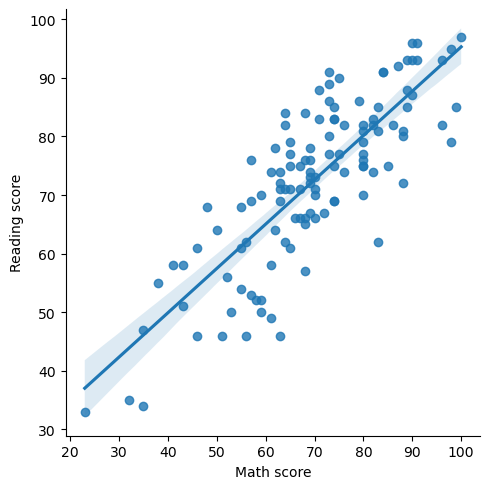

In [35]:
sns.lmplot(x="Math score", y="Reading score", data=exams_dfClean)

## 5. Conclusion

Excel and Jupyter Notebook are both powerful tools for data analysis and descriptive statistics, but they have different strengths and weaknesses. Here are some of the differences and benefits of using each tool:

#### Excel:

Excel is a widely used spreadsheet software which provided a user-friendly interface for analyzing data and creating charts and graphs. It was easy to use and required minimal programming knowledge, and it is easily accessible. Excel had a wide range of built-in functions and tools that I used to perform common statistical analyses, such as calculating mean, median, and standard deviation. Excel can handle large datasets and has powerful data manipulation features, such as sorting, filtering, and pivot tables. Excel allows for easy collaboration and sharing of data and analyses with others.

#### Jupyter Notebook:

Jupyter Notebook is an open-source web application that allows users to create and share documents that contain live code, equations, visualizations, and narrative text. Jupyter Notebook supports a wide range of programming languages, including Python, R, and Julia, making it a flexible tool for data analysis and scientific computing(in this case i was using python). With Jupyter Notebook analyses can be easily shared and replicated by others. Jupyter Notebook provided a more customizable and flexible environment for data analysis, where i wrote and executed my code using a range of third-party libraries and tools. Jupyter Notebook provides an interactive and iterative environment for data analysis, which allowed me to explore data and test different hypotheses quickly.

#### When will I use either of them? 
It would really depend on the specific needs that I have and the task at hand. Excel is more user-friendly and accessible for basic data analysis tasks, while Jupyter Notebook provides more flexibility and customization for advanced analyses and scientific computing. For example, if I need to perform a quick analysis of a small dataset, Excel may be the better option, while if I need to perform more complex analyses or work with large datasets, Jupyter Notebook may be more suitable. Ultimately, it's a matter of personal preference and the specific requirements of the project.

#### If you could do this assignment over what would you do differently? 
I would give myself enough time to play around with the jupyter notebook interface and familiarise myself with it, to learn the functions and explore what else i could do with it. The more I practice, the better I will become. I'd practice using both Excel and Jupyter Notebook, as both tools have their strengths and weaknesses. I'd ensure I understand the statistical concepts and theories behind the calculations I am performing. This will help me to interpret my results correctly and make meaningful conclusions. I'd pay attention to the requirements and any specific guidelines provided by your instructor. I will make sure my work is well-organized and easy to follow. Use clear headings and labels, and provide explanations for any calculations I perform. Double-check my work to ensure accuracy. Use multiple sources to verify my results, and try to spot any errors or inconsistencies.

#### What are the gaps in your programming or stats knowledge?
Because i have limited knowledge of statistical theory, i still experience difficulty in understanding of the underlying statistical theories and concepts. This impacts my ability to interpret and apply statistical techniques correctly. Even though I have completed my assignments using Excel and Jupyter Notebook. Although i have experience using Excel and Jupyter Notebook, I would like to consider exploring other statistical software or programming languages to expand my knowledge and skills. This will help me to determine which tools are best suited for different tasks and situations. Descriptive statistics often involves presenting data in visual form. I still have trouble in understanding data visualization, which impacts my ability to present my findings effectively.  Descriptive statistics is only one part of statistical analysis. I think it would serve me well to consider exploring statistical inference techniques, which involve drawing conclusions about a larger population based on a sample. This can help me to expand my understanding of statistical analysis and how it can be used to make informed decisions.